Aca quiero armar el codigo que sirva para mostrar los ejemplos de staircase necesrios para la redaccion de la tesis. 

Empiezo por procesar datos de un archivo de backup que encontre del 7 de dic de 2015 porque es el ultimo archivo de tamaño grande posterior al 5 de dic que es una fecha en la que segun el codigo de VisoundJava estaba implementado el codigo que me interesa mostrar. 

In [1]:
#imnportamos cosas y giladas
%matplotlib inline
from os import listdir
from os.path import isfile, join
import pandas as pd
import json
from IPython.display import display

In [2]:
# Cargamos el nombre del archivo
fileName = '7Dic15.json'
# Lo leemos como json
with open(fileName) as data_file:
    db = json.load(data_file)

In [3]:
spd = pd.DataFrame (db['SessionEnviables'])
lpd = pd.DataFrame (db['LevelEnviables'])
tpd = pd.DataFrame (db['TrialEnviables'])

# Extraemos la info de sesiones
spd = pd.DataFrame(pd.concat([spd[0].dropna(), spd[1].dropna()])).reset_index()
for key in spd[0].iloc[0]:
    spd[key] = spd[0].map(lambda x: x[key] if key in x.keys() else None)
spd = spd.drop([0],1)
spd = spd.drop(['status','class','index'],1)
spd = spd.rename(columns={'id': 'sessionId'})

# Extraemos la info de niveles
lpd = pd.DataFrame(pd.concat([lpd[0].dropna(), lpd[1].dropna()])).reset_index()
for key in lpd[0].iloc[0]:
    lpd[key] = lpd[0].map(lambda x: x[key] if key in x.keys() else None)
lpd = lpd.drop([0],1)
lpd = lpd.drop(['index','status','startTrialPosition','trialsVisited','exitTrialPosition','timeStarts',
               'exitTrialId','timeExit','sortOfTrials','class','levelLength'],1)

# Extraemos la info de trials
tpd = pd.DataFrame(pd.concat([tpd[0].dropna(), tpd[1].dropna()])).reset_index()
for key in tpd[0].iloc[0]:
    tpd[key] = tpd[0].map(lambda x: x[key] if key in x.keys() else None)
tpd = tpd.drop([0],1)
tpd = tpd.drop(['index','resourcesIdSort','trialInstance','distribucionEnPantalla','trialExitRecorded',
                'soundLog','class','timeStopTrialInLevel','indexOfTrialInLevel','trialTitle','categoriasElementos',
               'timeInTrial','trialId','version','timeTrialStart','categoriasRta','timeExitTrial','trialsInLevel',
               'status','resourcesVersion'],1)


# conjunto = pd.merge(spd, lpd, on='sessionId')
# conjunto = pd.merge(conjunto, tpd, on='levelInstance')

# Extraemos la info de que paso en cada trial
tpd['RespuestaCorrecta'] = tpd['touchLog'].map(lambda x: x[0]['isTrue'] if len(x)==1 else None)
tpd['NivelEstimulo'] = tpd['jsonMetaDataRta'].map(lambda x: x['infoConceptual']['deltaAnguloLinealizado'] if 'infoConceptual' in x else None )

In [4]:
# Tiramos registros duplicados de instancias de niveles
lpd = lpd.drop_duplicates(['levelInstance'])
resultados = []
for instance in lpd['levelInstance']:
    elemento = {}
    elemento['aciertos'] = list(tpd[tpd['levelInstance']==instance]['RespuestaCorrecta'])
    elemento['levelInstance'] = instance
    elemento['niveles'] = list(tpd[tpd['levelInstance']==instance]['NivelEstimulo'])
    elemento['nivel'] = lpd[lpd['levelInstance']==instance].iloc[0]['levelTitle']
    elemento['usuario'] = lpd[lpd['levelInstance']==instance].iloc[0]['idUser'] 
    resultados = resultados + [elemento]

resultados = [elemento for elemento in resultados if len(elemento['aciertos'])==40]
DataLinda = pd.DataFrame(resultados)



In [5]:
# Agregamos los datos random recreados
# Cargamos el nombre del archivo
fileName = 'random.info'
file = open('random.info', 'r')
# Lo leemos como json
entrada = file.readline()
entrada = entrada [1:-1]
datos = json.loads(entrada)

ValueError: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)

Ahora vamos a hacer un grafico mas o menos lindo

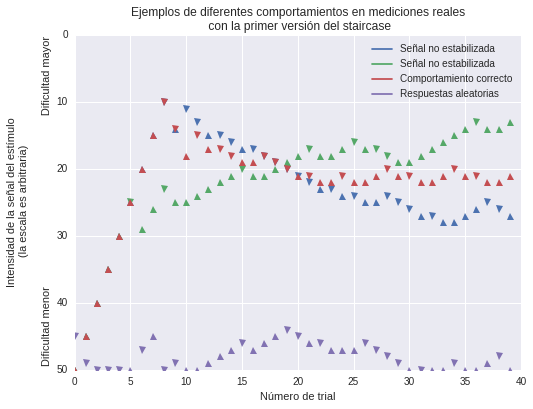

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
fig, ax = plt.subplots(1,1,figsize=(8,6))

plt.axis([0, 40, 50, 0])

indices = [0,3,1,25]
lables = ['Señal no estabilizada', 'Señal no estabilizada', 'Comportamiento correcto', 'Respuestas aleatorias']
colors=sns.color_palette()

for i,ind in enumerate(indices):
    # ax.plot(DataLinda['niveles'].iloc[ind], label=lables[i], color=colors[i])
    ax.plot([], label=lables[i], color=colors[i])
    # Dibujamos los triangulos hacia abajo
    x = [indice for indice in range(len(DataLinda['niveles'].iloc[ind])) if DataLinda['aciertos'].iloc[ind][indice]]
    y = [DataLinda['niveles'].iloc[ind][indice] for indice in range(len(DataLinda['niveles'].iloc[ind])) if DataLinda['aciertos'].iloc[ind][indice]]
    ax.plot(x, y, '^', color=colors[i])
    # Dibujamos los triangulos hacia arriba
    x = [indice for indice in range(len(DataLinda['niveles'].iloc[ind])) if not DataLinda['aciertos'].iloc[ind][indice]]
    y = [DataLinda['niveles'].iloc[ind][indice] for indice in range(len(DataLinda['niveles'].iloc[ind])) if not DataLinda['aciertos'].iloc[ind][indice]]
    ax.plot(x, y, 'v', color=colors[i])
    
    
plt.title('Ejemplos de diferentes comportamientos en mediciones reales \n con la primer versión del staircase')
plt.xlabel('Número de trial')
plt.ylabel('Intensidad de la señal del estímulo \n (la escala es arbitraria) \n \n Dificultad menor                                                         Dificultad mayor')

#plt.ylabel('Nivel de la señal (escala lineal arbitraria)')
#plt.text(-4,54,'Mayor dificultad',rotation=90, fontsize=10)

ax.legend()
fig.savefig('./../Images/StairCase1.png', bbox_inches='tight', dpi=600)


# El cero esta subiendo
# El uno se estabiliza
# El tres baja
# el 16 rebotes rapidos
# 21 lindo ejemplo
# 25 es una respuesta random

In [5]:
DataLinda

,aciertos,levelInstance,nivel,niveles,usuario
0,"[True, True, True, True, True, True, True, Tru...",1449175279641,H0R:-6.0º,"[50.0, 45.0, 40.0, 35.0, 30.0, 25.0, 20.0, 15....",1449175277519
1,"[True, True, True, True, True, True, True, Tru...",1449175717053,H1R:-3.0º,"[50.0, 45.0, 40.0, 35.0, 30.0, 25.0, 20.0, 15....",1449175277519
2,"[True, True, True, True, True, True, True, Tru...",1449176001080,H2R:0.0º,"[50.0, 45.0, 40.0, 35.0, 30.0, 25.0, 20.0, 15....",1449175277519
3,"[True, True, True, True, True, False, True, Tr...",1449176252505,H3R:3.0º,"[50.0, 45.0, 40.0, 35.0, 30.0, 25.0, 29.0, 26....",1449175277519
4,"[True, True, True, True, True, False, True, Tr...",1449176494889,H4R:6.0º,"[50.0, 45.0, 40.0, 35.0, 30.0, 25.0, 29.0, 26....",1449175277519
5,"[True, True, True, True, True, False, False, F...",1449176865049,1C0R:10.0º,"[50.0, 45.0, 40.0, 35.0, 30.0, 29.0, 25.0, 33....",1449175277519
6,"[True, True, True, True, False, True, False, T...",1449177398829,1C1R:20.0º,"[50.0, 45.0, 40.0, 35.0, 30.0, 34.0, 31.0, 33....",1449175277519
7,"[True, True, False, True, True, True, False, T...",1449177629528,1C2R:30.0º,"[50.0, 45.0, 40.0, 44.0, 41.0, 38.0, 35.0, 37....",1449175277519
8,"[True, False, True, False, True, True, True, T...",1449178009491,1C3R:40.0º,"[50.0, 45.0, 49.0, 46.0, 48.0, 48.0, 47.0, 46....",1449175277519
9,"[True, True, True, True, False, True, True, Tr...",1449178900253,1C4R:50.0º,"[50.0, 45.0, 40.0, 35.0, 30.0, 34.0, 31.0, 28....",1449175277519
